In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
from scipy.stats import multivariate_normal

/Users/deepprakashravi/.conda/envs/general-env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Path to the JSON file
file_path = './gmm_data.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python dictionary containing the parsed JSON
print(data)

{'weights': [0.13975697388878883, 0.032475098580804815, 0.3314140251536084, 0.2629935239282863, 0.1555757716548447, 0.07778460679366694], 'means': [[3.720866454450332, 0.45961329852621985, -0.38300779526332207, 0.12209565687752709, -0.02935803770007787, -0.07587139703538595, 0.06149975533981998, -0.019286542713047465], [0.8393080155356029, 0.5560511151946358, -0.5451008202210555, -0.02158307688807171, 0.06255668281592365, 0.005300610974839652, -0.027917888118645776, 0.021995670493972035], [-3.9240723495425174, -0.45191190195884273, 0.0860467943356821, 0.01971149429548336, 0.031362577641666035, -0.011694681738611434, 0.004087557754530032, -0.007234908997173534], [-2.669952700893602, -0.01714639119667355, -0.20711260992073163, -0.08341123607329382, -0.11821180023226989, 0.005116150814889944, -0.00601284043968098, -0.01565790321601217], [-0.6674080818208492, 1.4467891085471003, 1.056329676789548, 0.00837660636155582, -0.013307754762029004, 0.013919226418002981, 0.0034149082629030777, -0.0

In [3]:
for key, values in data.items():
    print(key)

weights
means
cov


In [4]:
means=[]
covariances=[]
for i in range(len(data["means"])):
    means.append(data["means"][i])
    covariances.append(data["cov"][i])

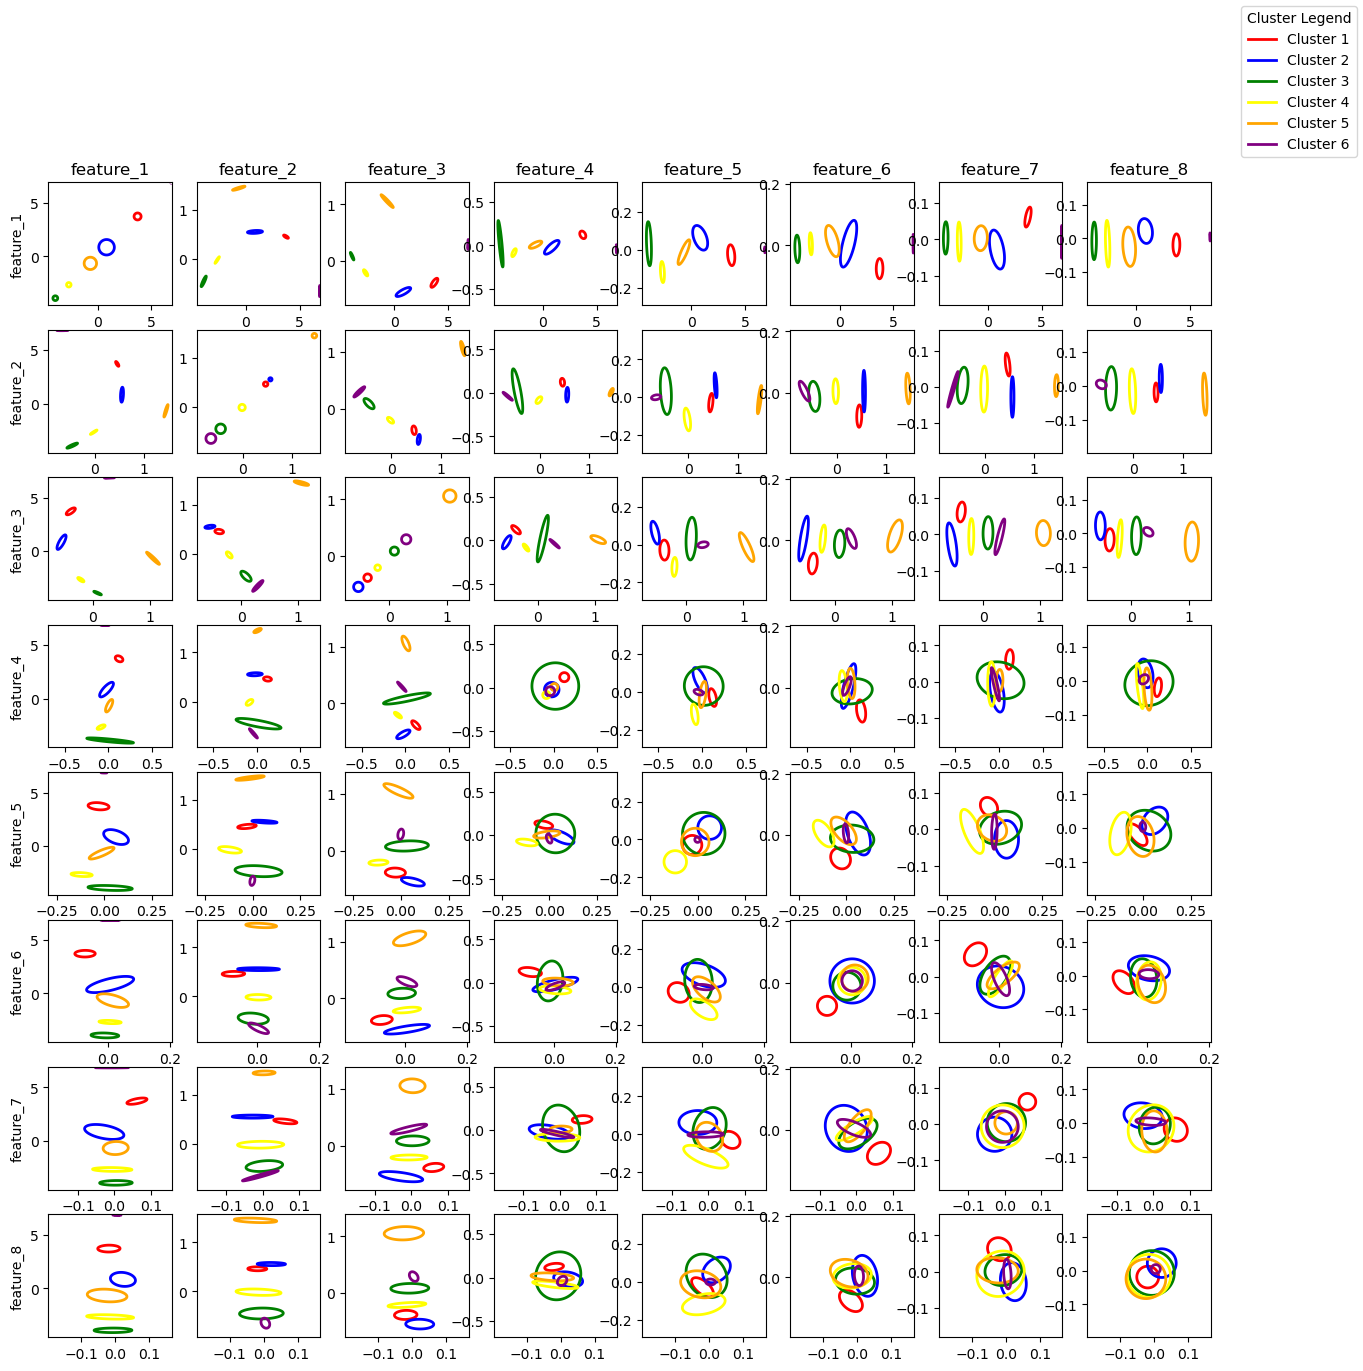

In [5]:


K = len(data["weights"]) # Number of cluster
D = len(means[0])  # 8 Dimesion of feature space

n =3 # how far in terms of std you want to plot

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=D, ncols=D, figsize=(15, 15))
label_to_color = { 0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'purple'}

for i in range(K):
    # Create different plot of each cluster
    for j in range(D):
        for k in range(D):
            if j==k:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.diag([covariances[i][j][j], covariances[i][k][k]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1,colors=label_to_color[i], linewidths=2)
                
                
            else:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.array([[covariances[i][j][j],covariances[i][j][k]],[covariances[i][k][j], covariances[i][k][k]]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1, colors=label_to_color[i], linewidths=2)
                
            #
                
            if j==0:
                axes[j][k].set_title(f'feature_{k+1}')
            if k==0:
                axes[j][k].set_ylabel(f'feature_{j+1}')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color, lw=2, label=f'Cluster {i + 1}')
                   for i, color in label_to_color.items()]
# Add a legend
lines = [] 
labels = [] 
  
for ax in fig.axes: 
    Line, Label = ax.get_legend_handles_labels() 
    lines.extend(Line) 
    labels.extend(Label)
fig.legend(handles=legend_elements, loc='upper right', title='Cluster Legend')

plt.show() 